In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# Plot settings
plt.style.use("default")
sns.set_theme()


In [2]:
data_path = "../data/raw/data.csv"
df = pd.read_csv(data_path)

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.00,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.00,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns.tolist())

# Data types and non-null counts
print("\nData Info:")
df.info()


Dataset shape: (95662, 16)

Columns:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-nul

In [4]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"], errors="coerce")

df["TransactionStartTime"].head()


0   2018-11-15 02:18:49+00:00
1   2018-11-15 02:19:08+00:00
2   2018-11-15 02:44:21+00:00
3   2018-11-15 03:32:55+00:00
4   2018-11-15 03:34:21+00:00
Name: TransactionStartTime, dtype: datetime64[ns, UTC]

In [5]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.00,95662.00,95662.00,95662.00,95662.00
mean,256.00,6717.85,9900.58,2.26,0.00
std,0.00,123306.80,123122.09,0.73,0.04
min,256.00,-1000000.00,2.00,0.00,0.00
25%,256.00,-50.00,275.00,2.00,0.00
50%,256.00,1000.00,1000.00,2.00,0.00
75%,256.00,2800.00,5000.00,2.00,0.00
max,256.00,9880000.00,9880000.00,4.00,1.00


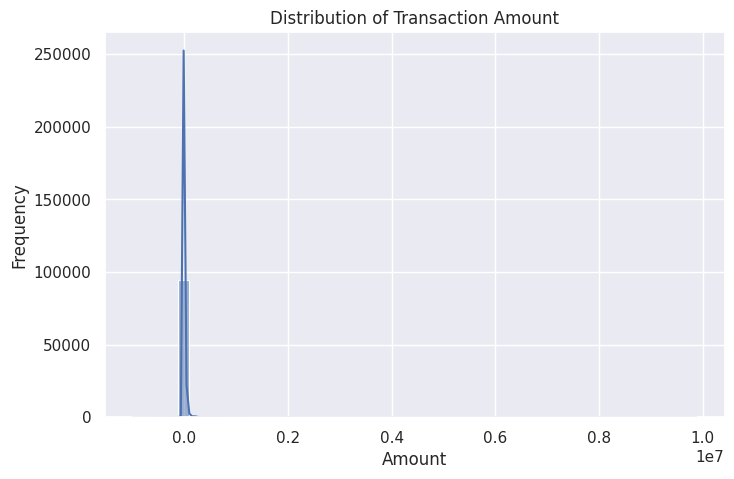

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


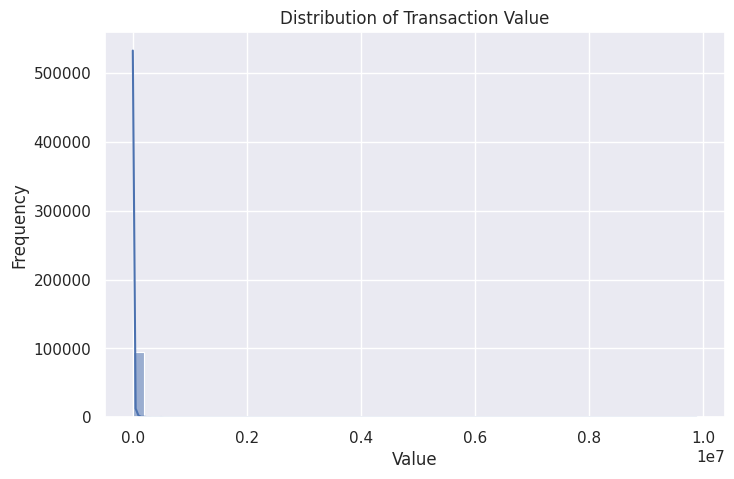

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Value"], bins=50, kde=True)
plt.title("Distribution of Transaction Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


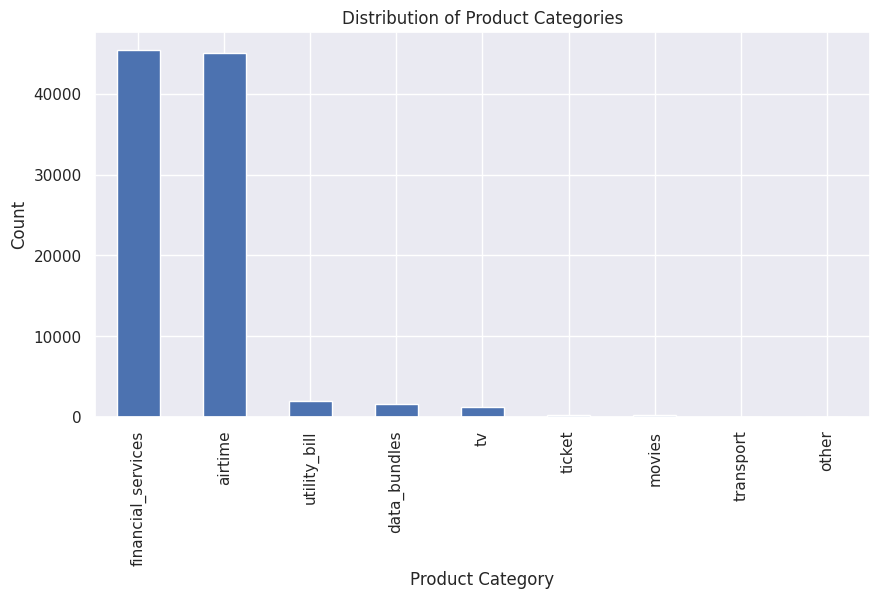

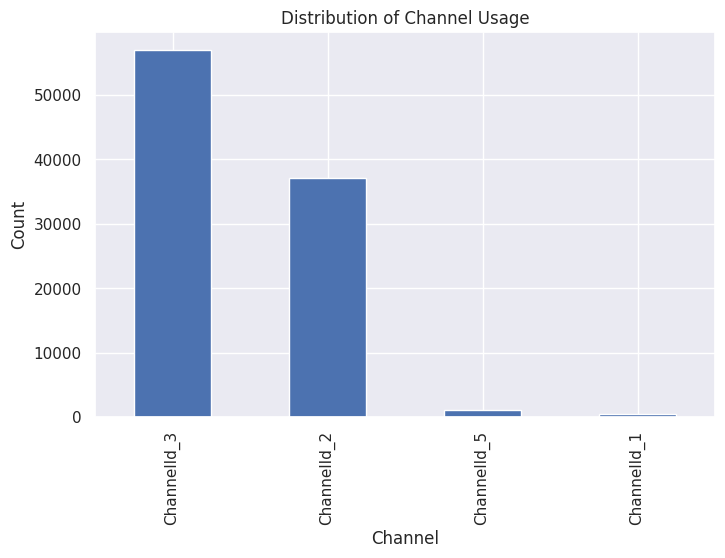

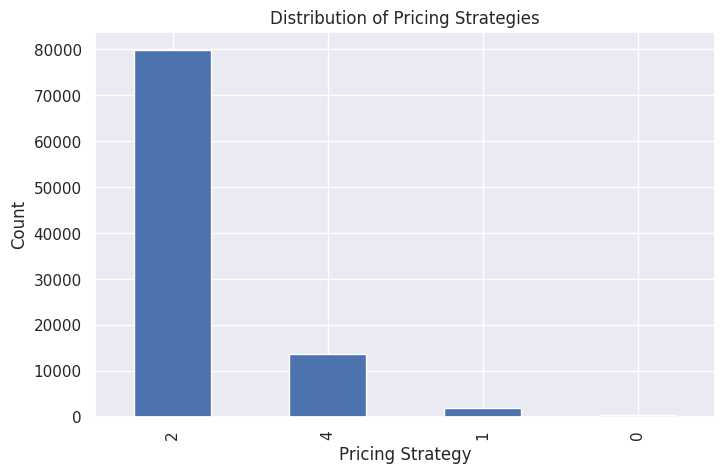

In [8]:
plt.figure(figsize=(10, 5))
df["ProductCategory"].value_counts().plot(kind="bar")
plt.title("Distribution of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()



plt.figure(figsize=(8, 5))
df["ChannelId"].value_counts().plot(kind="bar")
plt.title("Distribution of Channel Usage")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()



plt.figure(figsize=(8, 5))
df["PricingStrategy"].value_counts().plot(kind="bar")
plt.title("Distribution of Pricing Strategies")
plt.xlabel("Pricing Strategy")
plt.ylabel("Count")
plt.show()


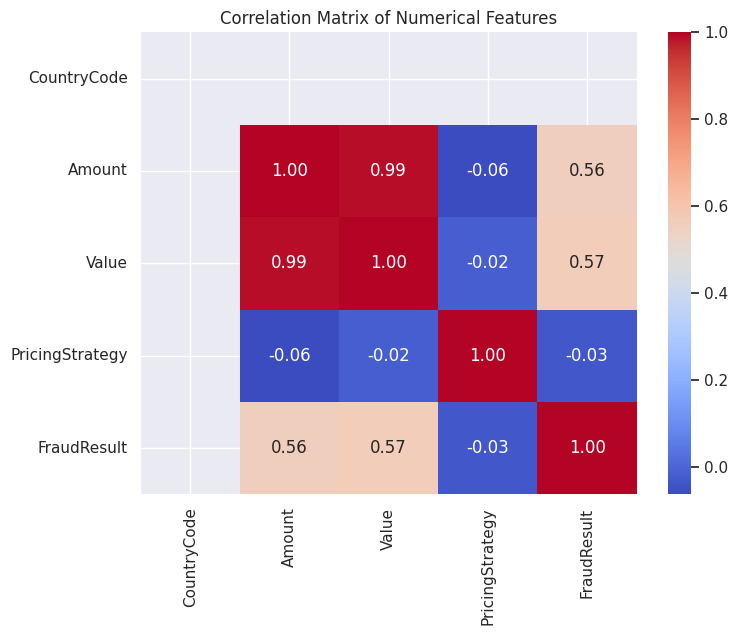

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage (%)": missing_percentage
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_df


,Missing Count,Missing Percentage (%)
TransactionId,0,0.00
BatchId,0,0.00
AccountId,0,0.00
SubscriptionId,0,0.00
CustomerId,0,0.00
CurrencyCode,0,0.00
CountryCode,0,0.00
ProviderId,0,0.00
ProductId,0,0.00
ProductCategory,0,0.00


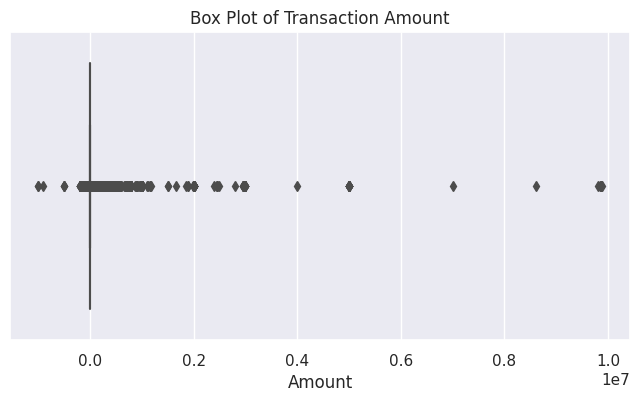

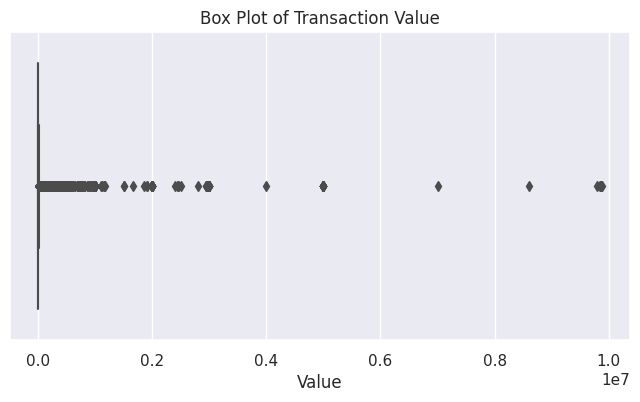

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Amount"])
plt.title("Box Plot of Transaction Amount")
plt.show()



plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Value"])
plt.title("Box Plot of Transaction Value")
plt.show()


## Key Insights from EDA

1. Transaction amounts and values are highly right-skewed, indicating that most customers make small purchases while a small number of users account for very large transaction values.

2. A limited number of product categories and channels dominate transaction activity, suggesting strong behavioral patterns that can be leveraged for credit risk prediction.

3. Significant outliers are present in transaction amounts and values, highlighting the need for robust aggregation and normalization techniques during feature engineering.

4. Numerical features are limited and highly correlated, reinforcing the importance of creating behavioral features such as Recency, Frequency, and Monetary (RFM) metrics.

5. Missing values are minimal across most features, indicating good overall data quality and limited need for complex imputation strategies.
